Welcome to my notebook! This is a copy/paste welcome message for all my notebooks :)
📓 This repository/notebook serves as a personal reminder for me, 
documenting code snippets and techniques sourced from various learning resources. 
The goal is to consolidate valuable information and create a basic reference guide. 
Please note that the codes included here are not originally mine, and credit goes 
to the respective authors and resources. Feel free to explore and 
use this collection as a shared learning space. Happy coding

#### Sources for this notebook : 
    * https://github.com/PacktPublishing/PyTorch-Computer-Vision-Cookbook/tree/master/Chapter06
    * https://zenodo.org/record/1322001#.XcX1jk9KhhE
    
#### Purpose :
    * single object segmentation by Pytorch.
    
#### Keywords :
    * object segmentation

First let's see what we have as data

In [1]:
import os
path2train="./data_sng_seg/training_set/"

imgsList=[pp for pp in os.listdir(path2train) if "Annotation" not in pp and "Thumb" not in pp]
anntsList=[pp for pp in os.listdir(path2train) if "Annotation" in pp]
print("number of images:", len(imgsList))
print("number of annotations:", len(anntsList))

number of images: 999
number of annotations: 999


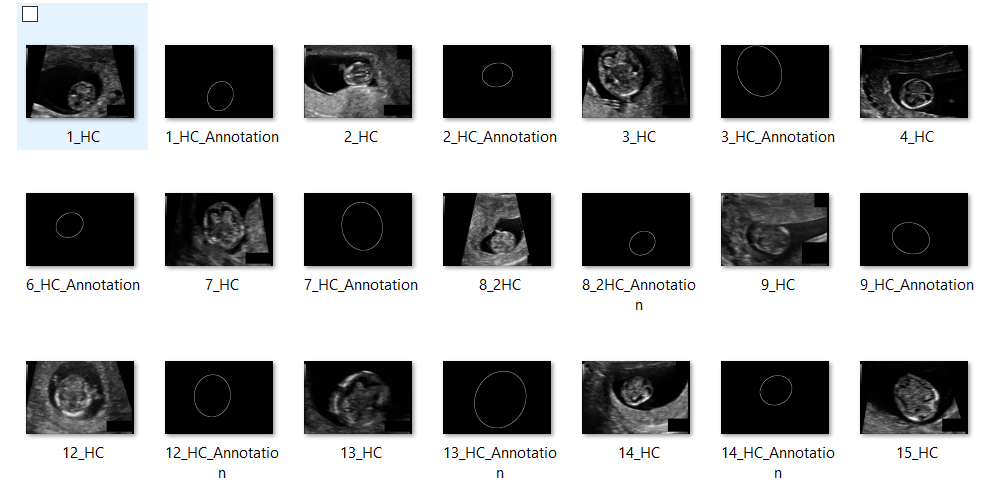

In [2]:
imgsList

['100_2HC.png',
 '101_HC.png',
 '102_2HC.png',
 '103_HC.png',
 '104_HC.png',
 '105_HC.png',
 '106_HC.png',
 '107_HC.png',
 '108_2HC.png',
 '109_HC.png',
 '10_2HC.png',
 '110_HC.png',
 '111_HC.png',
 '112_HC.png',
 '113_HC.png',
 '114_2HC.png',
 '115_HC.png',
 '116_HC.png',
 '117_HC.png',
 '118_HC.png',
 '119_HC.png',
 '11_2HC.png',
 '120_HC.png',
 '121_HC.png',
 '122_2HC.png',
 '123_HC.png',
 '124_2HC.png',
 '125_2HC.png',
 '126_HC.png',
 '127_HC.png',
 '128_HC.png',
 '129_HC.png',
 '12_HC.png',
 '130_HC.png',
 '131_2HC.png',
 '132_HC.png',
 '133_2HC.png',
 '134_3HC.png',
 '135_HC.png',
 '136_HC.png',
 '137_HC.png',
 '138_HC.png',
 '139_HC.png',
 '13_HC.png',
 '140_HC.png',
 '141_HC.png',
 '142_HC.png',
 '143_HC.png',
 '144_HC.png',
 '145_HC.png',
 '146_HC.png',
 '147_HC.png',
 '148_2HC.png',
 '149_HC.png',
 '14_HC.png',
 '150_HC.png',
 '151_HC.png',
 '152_2HC.png',
 '153_HC.png',
 '154_2HC.png',
 '155_3HC.png',
 '156_HC.png',
 '157_2HC.png',
 '158_3HC.png',
 '159_HC.png',
 '15_HC.png'

In [3]:
anntsList

['100_2HC_Annotation.png',
 '101_HC_Annotation.png',
 '102_2HC_Annotation.png',
 '103_HC_Annotation.png',
 '104_HC_Annotation.png',
 '105_HC_Annotation.png',
 '106_HC_Annotation.png',
 '107_HC_Annotation.png',
 '108_2HC_Annotation.png',
 '109_HC_Annotation.png',
 '10_2HC_Annotation.png',
 '110_HC_Annotation.png',
 '111_HC_Annotation.png',
 '112_HC_Annotation.png',
 '113_HC_Annotation.png',
 '114_2HC_Annotation.png',
 '115_HC_Annotation.png',
 '116_HC_Annotation.png',
 '117_HC_Annotation.png',
 '118_HC_Annotation.png',
 '119_HC_Annotation.png',
 '11_2HC_Annotation.png',
 '120_HC_Annotation.png',
 '121_HC_Annotation.png',
 '122_2HC_Annotation.png',
 '123_HC_Annotation.png',
 '124_2HC_Annotation.png',
 '125_2HC_Annotation.png',
 '126_HC_Annotation.png',
 '127_HC_Annotation.png',
 '128_HC_Annotation.png',
 '129_HC_Annotation.png',
 '12_HC_Annotation.png',
 '130_HC_Annotation.png',
 '131_2HC_Annotation.png',
 '132_HC_Annotation.png',
 '133_2HC_Annotation.png',
 '134_3HC_Annotation.png',
 '1

In [4]:
import numpy as np
np.random.seed(2019)
rndImgs=np.random.choice(imgsList,4)
rndImgs

array(['166_2HC.png', '434_HC.png', '244_HC.png', '826_3HC.png'],
      dtype='<U11')

In [5]:
import matplotlib.pylab as plt
from PIL import Image
from scipy import ndimage as ndi
from skimage.segmentation import mark_boundaries
from torchvision.transforms.functional import to_tensor, to_pil_image
import torch

def show_img_mask(img, mask):
    if torch.is_tensor(img):
        img=to_pil_image(img)
        mask=to_pil_image(mask)
        
    img_mask=mark_boundaries(np.array(img), 
                        np.array(mask),
                        outline_color=(0,1,0),
                        color=(0,1,0))
    plt.imshow(img_mask)

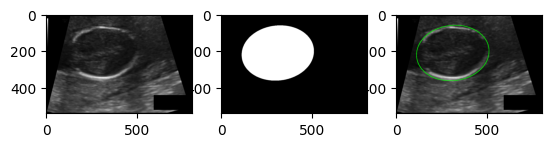

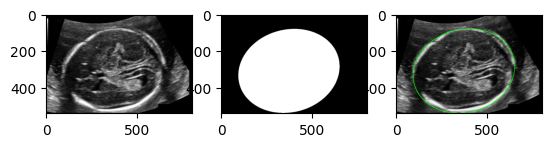

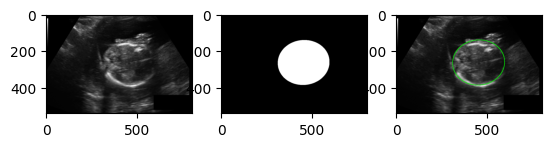

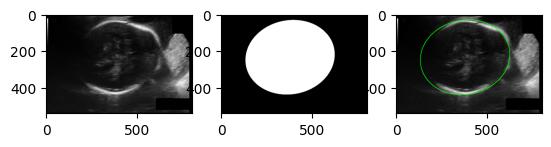

In [6]:
for fn in rndImgs:
    path2img = os.path.join(path2train, fn)
    path2annt= path2img.replace(".png", "_Annotation.png")
    img = Image.open(path2img)
    annt_edges = Image.open(path2annt)
    mask = ndi.binary_fill_holes(annt_edges)        

    plt.figure()
    plt.subplot(1, 3, 1) 
    plt.imshow(img, cmap="gray")

    plt.subplot(1, 3, 2) 
    plt.imshow(mask, cmap="gray")

    plt.subplot(1, 3, 3) 
    show_img_mask(img, mask)

In [7]:
from albumentations import (
    HorizontalFlip,
    VerticalFlip,    
    Compose,
    Resize,
)

h,w=128,192
transform_train = Compose([ Resize(h,w), 
                HorizontalFlip(p=0.5), 
                VerticalFlip(p=0.5), 
              ])


transform_val = Resize(h,w)

### Creating Custom Dataset

In [8]:
from torch.utils.data import Dataset
from PIL import Image
from torchvision.transforms.functional import to_tensor, to_pil_image

In [9]:
class fetal_dataset(Dataset):
    def __init__(self, path2data, transform=None):      

        imgsList=[pp for pp in os.listdir(path2data) if "Annotation" not in pp and "Thumb" not in pp]
        anntsList=[pp for pp in os.listdir(path2train) if "Annotation" in pp]

        self.path2imgs = [os.path.join(path2data, fn) for fn in imgsList] 
        self.path2annts= [p2i.replace(".png", "_Annotation.png") for p2i in self.path2imgs]

        self.transform = transform
    
    def __len__(self):
        return len(self.path2imgs)
      
    def __getitem__(self, idx):
        path2img = self.path2imgs[idx]
        image = Image.open(path2img)

        path2annt = self.path2annts[idx]
        annt_edges = Image.open(path2annt)
        mask = ndi.binary_fill_holes(annt_edges)        
        
        image= np.array(image)
        mask=mask.astype("uint8")        

        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask']            

        image= to_tensor(image)            
        mask=255*to_tensor(mask)            
        return image, mask

In [10]:
fetal_ds1=fetal_dataset(path2train, transform=transform_train)
fetal_ds2=fetal_dataset(path2train, transform=transform_val)
print(len(fetal_ds1))
print(len(fetal_ds2))

999
999


In [11]:
img,mask=fetal_ds1[0]
print(img.shape, img.type(),torch.max(img))
print(mask.shape, mask.type(),torch.max(mask))

torch.Size([1, 128, 192]) torch.FloatTensor tensor(0.9529)
torch.Size([1, 128, 192]) torch.FloatTensor tensor(1.)


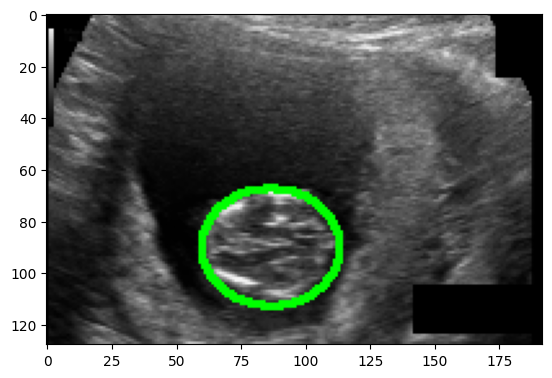

In [12]:
show_img_mask(img, mask)

### Split data into train validation

In [13]:
from sklearn.model_selection import ShuffleSplit

sss = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

indices=range(len(fetal_ds1))

for train_index, val_index in sss.split(indices):
    print(len(train_index))
    print("-"*10)
    print(len(val_index))

799
----------
200


In [14]:
from torch.utils.data import Subset

train_ds=Subset(fetal_ds1,train_index)
print(len(train_ds))

val_ds=Subset(fetal_ds2,val_index)
print(len(val_ds))

799
200


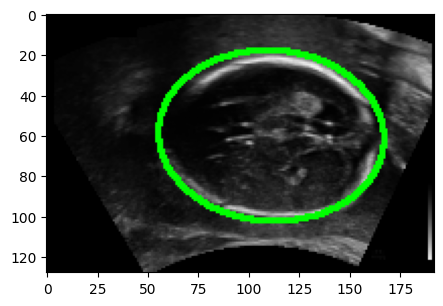

In [15]:
plt.figure(figsize=(5,5))
for img,mask in train_ds:
    show_img_mask(img,mask)
    break

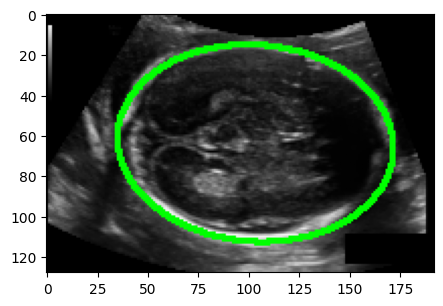

In [16]:
plt.figure(figsize=(5,5))
for img,mask in val_ds:
    show_img_mask(img,mask)
    break

### Creating DataLoader

In [17]:
from torch.utils.data import DataLoader
train_dl = DataLoader(train_ds, batch_size=8, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=16, shuffle=False)

In [18]:
for img_b, mask_b in train_dl:
    print(img_b.shape,img_b.dtype)
    print(mask_b.shape, mask_b.dtype)
    break

torch.Size([8, 1, 128, 192]) torch.float32
torch.Size([8, 1, 128, 192]) torch.float32


In [19]:
for img_b, mask_b in val_dl:
    print(img_b.shape,img_b.dtype)
    print(mask_b.shape, mask_b.dtype)
    break

torch.Size([16, 1, 128, 192]) torch.float32
torch.Size([16, 1, 128, 192]) torch.float32


In [20]:
torch.max(img_b)

tensor(0.9961)

### Creating the Model

In [21]:
import torch.nn as nn
import torch.nn.functional as F

In [22]:
class SegNet(nn.Module):
    def __init__(self, params):
        super(SegNet, self).__init__()
        
        C_in, H_in, W_in=params["input_shape"]
        init_f=params["initial_filters"] 
        num_outputs=params["num_outputs"] 

        self.conv1 = nn.Conv2d(C_in, init_f, kernel_size=3,stride=1,padding=1)
        self.conv2 = nn.Conv2d(init_f, 2*init_f, kernel_size=3,stride=1,padding=1)
        self.conv3 = nn.Conv2d(2*init_f, 4*init_f, kernel_size=3,padding=1)
        self.conv4 = nn.Conv2d(4*init_f, 8*init_f, kernel_size=3,padding=1)
        self.conv5 = nn.Conv2d(8*init_f, 16*init_f, kernel_size=3,padding=1)

        self.upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)

        self.conv_up1 = nn.Conv2d(16*init_f, 8*init_f, kernel_size=3,padding=1)
        self.conv_up2 = nn.Conv2d(8*init_f, 4*init_f, kernel_size=3,padding=1)
        self.conv_up3 = nn.Conv2d(4*init_f, 2*init_f, kernel_size=3,padding=1)
        self.conv_up4 = nn.Conv2d(2*init_f, init_f, kernel_size=3,padding=1)

        self.conv_out = nn.Conv2d(init_f, num_outputs , kernel_size=3,padding=1)    
    
    def forward(self, x):
        
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)

        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)

        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2, 2)

        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, 2, 2)

        x = F.relu(self.conv5(x))

        x=self.upsample(x)
        x = F.relu(self.conv_up1(x))

        x=self.upsample(x)
        x = F.relu(self.conv_up2(x))
        
        x=self.upsample(x)
        x = F.relu(self.conv_up3(x))
        
        x=self.upsample(x)
        x = F.relu(self.conv_up4(x))

        x = self.conv_out(x)
        
        return x 

In [23]:
params_model={
        "input_shape": (1,h,w),
        "initial_filters": 16, 
        "num_outputs": 1,
            }

model = SegNet(params_model)

In [24]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model=model.to(device)

In [25]:
print(model)

SegNet(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (upsample): Upsample(scale_factor=2.0, mode='bilinear')
  (conv_up1): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_up2): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_up3): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_up4): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_out): Conv2d(16, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)


In [26]:
from torchsummary import summary
summary(model, input_size=(1, h, w))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 128, 192]             160
            Conv2d-2           [-1, 32, 64, 96]           4,640
            Conv2d-3           [-1, 64, 32, 48]          18,496
            Conv2d-4          [-1, 128, 16, 24]          73,856
            Conv2d-5           [-1, 256, 8, 12]         295,168
          Upsample-6          [-1, 256, 16, 24]               0
            Conv2d-7          [-1, 128, 16, 24]         295,040
          Upsample-8          [-1, 128, 32, 48]               0
            Conv2d-9           [-1, 64, 32, 48]          73,792
         Upsample-10           [-1, 64, 64, 96]               0
           Conv2d-11           [-1, 32, 64, 96]          18,464
         Upsample-12         [-1, 32, 128, 192]               0
           Conv2d-13         [-1, 16, 128, 192]           4,624
           Conv2d-14          [-1, 1, 1

### Define Loss Function

In [27]:
def dice_loss(pred, target, smooth = 1e-5):

    intersection = (pred * target).sum(dim=(2,3))
    union= pred.sum(dim=(2,3)) + target.sum(dim=(2,3)) 
    
    dice= 2.0 * (intersection + smooth) / (union+ smooth)    
    loss = 1.0 - dice
    
    return loss.sum(), dice.sum()

In [28]:
import torch.nn.functional as F

def loss_func(pred, target):
    bce = F.binary_cross_entropy_with_logits(pred, target,  reduction='sum')
    
    pred= torch.sigmoid(pred)
    dlv, _ = dice_loss(pred, target)
    
    loss = bce  + dlv

    return loss

In [29]:
import torchvision

def metrics_batch(pred, target):
    pred= torch.sigmoid(pred)
    _, metric=dice_loss(pred, target)
    
    return metric

In [30]:
def loss_batch(loss_func, output, target, opt=None):   
    loss = loss_func(output, target)
    
    with torch.no_grad():
        pred= torch.sigmoid(output)
        _, metric_b=dice_loss(pred, target)
    
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()

    return loss.item(), metric_b

### Optimizer

In [31]:
from torch import optim
opt = optim.Adam(model.parameters(), lr=3e-4)

In [32]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(opt, mode='min',factor=0.5, patience=20,verbose=1)

In [33]:
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']

current_lr=get_lr(opt)
print('current lr={}'.format(current_lr))

current lr=0.0003


### Training the Model

In [34]:
def loss_epoch(model,loss_func,dataset_dl,sanity_check=False,opt=None):
    running_loss=0.0
    running_metric=0.0
    len_data=len(dataset_dl.dataset)

    for xb, yb in dataset_dl:
        xb=xb.to(device)
        yb=yb.to(device)
        
        output=model(xb)
        loss_b, metric_b=loss_batch(loss_func, output, yb, opt)
        running_loss += loss_b
        
        if metric_b is not None:
            running_metric+=metric_b

        if sanity_check is True:
            break
    
    loss=running_loss/float(len_data)
    
    metric=running_metric/float(len_data)
    
    return loss, metric

In [35]:
import copy
def train_val(model, params):
    num_epochs=params["num_epochs"]
    loss_func=params["loss_func"]
    opt=params["optimizer"]
    train_dl=params["train_dl"]
    val_dl=params["val_dl"]
    sanity_check=params["sanity_check"]
    lr_scheduler=params["lr_scheduler"]
    path2weights=params["path2weights"]
    
    loss_history={
        "train": [],
        "val": []}
    
    metric_history={
        "train": [],
        "val": []}    
    
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss=float('inf')    
    
    for epoch in range(num_epochs):
        current_lr=get_lr(opt)
        print('Epoch {}/{}, current lr={}'.format(epoch, num_epochs - 1, current_lr))   

        model.train()
        train_loss, train_metric=loss_epoch(model,loss_func,train_dl,sanity_check,opt)

        loss_history["train"].append(train_loss)
        metric_history["train"].append(train_metric)
        
        model.eval()
        with torch.no_grad():
            val_loss, val_metric=loss_epoch(model,loss_func,val_dl,sanity_check)
       
        loss_history["val"].append(val_loss)
        metric_history["val"].append(val_metric)   
        
        if val_loss < best_loss:
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            
            torch.save(model.state_dict(), path2weights)
            print("Copied best model weights!")
            
        lr_scheduler.step(val_loss)
        if current_lr != get_lr(opt):
            print("Loading best model weights!")
            model.load_state_dict(best_model_wts) 
            
        print("train loss: %.6f, dice: %.2f" %(train_loss,100*train_metric))
        print("val loss: %.6f, dice: %.2f" %(val_loss,100*val_metric))
        print("-"*10) 
        

    model.load_state_dict(best_model_wts)
    return model, loss_history, metric_history

In [36]:
opt = optim.Adam(model.parameters(), lr=3e-4)
lr_scheduler = ReduceLROnPlateau(opt, mode='min',factor=0.5, patience=20,verbose=1)

path2models= "./models_sng_seg/"
if not os.path.exists(path2models):
        os.mkdir(path2models)

params_train={
    "num_epochs": 100,
    "optimizer": opt,
    "loss_func": loss_func,
    "train_dl": train_dl,
    "val_dl": val_dl,
    "sanity_check": False,
    "lr_scheduler": lr_scheduler,
    "path2weights": path2models+"weights.pt",
}

model,loss_hist,metric_hist=train_val(model,params_train)

Epoch 0/99, current lr=0.0003
Copied best model weights!
train loss: 11686.601303, dice: 42.62
val loss: 8035.808398, dice: 55.07
----------
Epoch 1/99, current lr=0.0003
Copied best model weights!
train loss: 6160.761367, dice: 70.42
val loss: 4967.054941, dice: 76.20
----------
Epoch 2/99, current lr=0.0003
Copied best model weights!
train loss: 4789.242515, dice: 76.72
val loss: 4775.892520, dice: 76.59
----------
Epoch 3/99, current lr=0.0003
Copied best model weights!
train loss: 4113.842225, dice: 79.72
val loss: 3640.980645, dice: 81.30
----------
Epoch 4/99, current lr=0.0003
Copied best model weights!
train loss: 3430.384892, dice: 82.59
val loss: 3266.821826, dice: 84.22
----------
Epoch 5/99, current lr=0.0003
Copied best model weights!
train loss: 2923.853488, dice: 84.96
val loss: 2777.215000, dice: 86.01
----------
Epoch 6/99, current lr=0.0003
Copied best model weights!
train loss: 2506.836789, dice: 87.29
val loss: 2524.083843, dice: 88.40
----------
Epoch 7/99, current

train loss: 745.124077, dice: 96.24
val loss: 1786.871802, dice: 94.63
----------
Epoch 68/99, current lr=0.00015
train loss: 747.149186, dice: 96.22
val loss: 1914.958955, dice: 94.57
----------
Epoch 69/99, current lr=0.00015
train loss: 713.782610, dice: 96.35
val loss: 1894.270474, dice: 94.84
----------
Epoch 70/99, current lr=0.00015
train loss: 742.463544, dice: 96.26
val loss: 1947.193750, dice: 94.54
----------
Epoch 71/99, current lr=0.00015
train loss: 736.585799, dice: 96.29
val loss: 1841.703252, dice: 94.78
----------
Epoch 72/99, current lr=0.00015
train loss: 709.784458, dice: 96.42
val loss: 1872.558672, dice: 94.52
----------
Epoch 73/99, current lr=0.00015
train loss: 739.789864, dice: 96.29
val loss: 1934.059604, dice: 94.66
----------
Epoch 74/99, current lr=0.00015
train loss: 692.794944, dice: 96.49
val loss: 2017.453828, dice: 94.75
----------
Epoch 75/99, current lr=0.00015
train loss: 692.389112, dice: 96.49
val loss: 1959.305210, dice: 94.86
----------
Epoch 

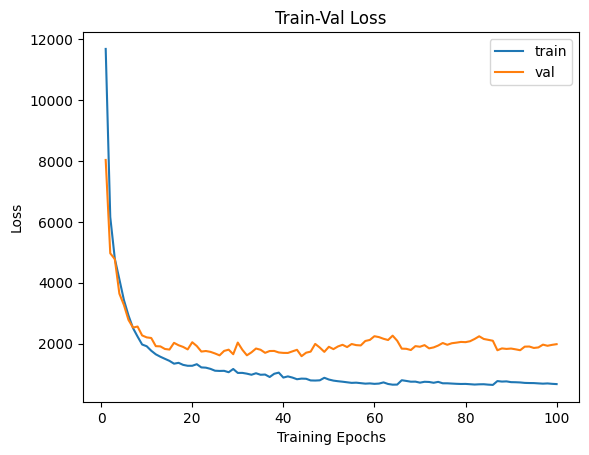

In [37]:
num_epochs=params_train["num_epochs"]

plt.title("Train-Val Loss")
plt.plot(range(1,num_epochs+1),loss_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),loss_hist["val"],label="val")
plt.ylabel("Loss")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

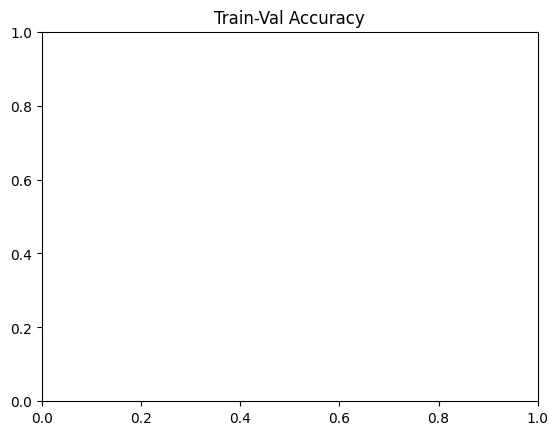

In [60]:
# plot accuracy progress
plt.title("Train-Val Accuracy")
plt.plot(range(1,num_epochs+1),metric_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),metric_hist["val"],label="val")
plt.ylabel("Accuracy")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

In [54]:
b=[]
for i in metric_hist["train"]:
    b.append(i.to("cpu"))

In [55]:
b

[tensor(0.4262),
 tensor(0.7042),
 tensor(0.7672),
 tensor(0.7972),
 tensor(0.8259),
 tensor(0.8496),
 tensor(0.8729),
 tensor(0.8869),
 tensor(0.9017),
 tensor(0.9035),
 tensor(0.9117),
 tensor(0.9177),
 tensor(0.9207),
 tensor(0.9247),
 tensor(0.9290),
 tensor(0.9329),
 tensor(0.9338),
 tensor(0.9362),
 tensor(0.9380),
 tensor(0.9363),
 tensor(0.9341),
 tensor(0.9412),
 tensor(0.9393),
 tensor(0.9426),
 tensor(0.9450),
 tensor(0.9449),
 tensor(0.9480),
 tensor(0.9465),
 tensor(0.9445),
 tensor(0.9496),
 tensor(0.9493),
 tensor(0.9500),
 tensor(0.9509),
 tensor(0.9511),
 tensor(0.9507),
 tensor(0.9520),
 tensor(0.9550),
 tensor(0.9502),
 tensor(0.9495),
 tensor(0.9559),
 tensor(0.9552),
 tensor(0.9561),
 tensor(0.9587),
 tensor(0.9580),
 tensor(0.9567),
 tensor(0.9594),
 tensor(0.9603),
 tensor(0.9604),
 tensor(0.9564),
 tensor(0.9583),
 tensor(0.9610),
 tensor(0.9611),
 tensor(0.9623),
 tensor(0.9630),
 tensor(0.9639),
 tensor(0.9639),
 tensor(0.9645),
 tensor(0.9655),
 tensor(0.9644

In [56]:
b_array = np.array(b)

In [57]:
b_array

array([0.42616653, 0.7042148 , 0.7671735 , 0.7971644 , 0.82591486,
       0.84955996, 0.872925  , 0.88688713, 0.9016664 , 0.9034862 ,
       0.91171736, 0.917731  , 0.92073226, 0.92470896, 0.92896646,
       0.93293875, 0.93379664, 0.93621707, 0.93803895, 0.936274  ,
       0.9341411 , 0.9412098 , 0.9392999 , 0.94259566, 0.945022  ,
       0.9448629 , 0.9480455 , 0.9464653 , 0.9444712 , 0.9496405 ,
       0.9492992 , 0.95001876, 0.9509444 , 0.951102  , 0.95070904,
       0.9520391 , 0.9549909 , 0.9502256 , 0.9494637 , 0.95591986,
       0.95521563, 0.9560606 , 0.95866364, 0.957978  , 0.95665747,
       0.9594    , 0.96033514, 0.9603769 , 0.9564483 , 0.9582616 ,
       0.96098655, 0.9611146 , 0.96226156, 0.963023  , 0.9639083 ,
       0.9638677 , 0.9644735 , 0.96553886, 0.9643676 , 0.9654479 ,
       0.9655218 , 0.96310437, 0.9659245 , 0.9669014 , 0.96698666,
       0.95965695, 0.960859  , 0.96236867, 0.9622314 , 0.9635186 ,
       0.9626313 , 0.96294093, 0.96423584, 0.9629055 , 0.96488

In [58]:
c=[]
for i in metric_hist["val"]:
    c.append(i.to("cpu"))

In [59]:
c_array = np.array(c)

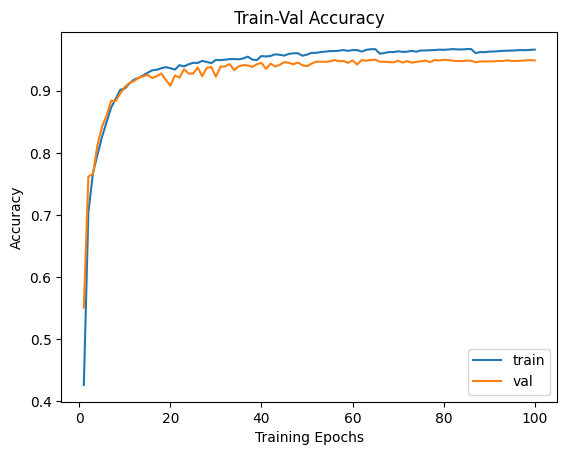

In [61]:
# plot accuracy progress
plt.title("Train-Val Accuracy")
plt.plot(range(1,num_epochs+1),b_array,label="train")
plt.plot(range(1,num_epochs+1),c_array,label="val")
plt.ylabel("Accuracy")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

## PART2 - DEPLOYMENT

In [64]:
import os
path2test="./data_sng_seg/test_set/"
imgsList=[pp for pp in os.listdir(path2test) if "Annotation" not in pp and "Thumb" not in pp]
print("number of images:", len(imgsList))


number of images: 335


In [65]:
imgsList

['100_HC.png',
 '101_HC.png',
 '102_2HC.png',
 '103_HC.png',
 '104_HC.png',
 '105_3HC.png',
 '106_HC.png',
 '107_3HC.png',
 '108_HC.png',
 '109_HC.png',
 '10_2HC.png',
 '110_HC.png',
 '111_HC.png',
 '112_2HC.png',
 '113_HC.png',
 '114_HC.png',
 '115_HC.png',
 '116_HC.png',
 '117_HC.png',
 '118_HC.png',
 '119_2HC.png',
 '11_HC.png',
 '120_HC.png',
 '121_HC.png',
 '122_2HC.png',
 '123_HC.png',
 '124_HC.png',
 '125_HC.png',
 '126_2HC.png',
 '127_HC.png',
 '128_HC.png',
 '129_2HC.png',
 '12_HC.png',
 '130_HC.png',
 '131_HC.png',
 '132_HC.png',
 '133_HC.png',
 '134_HC.png',
 '135_HC.png',
 '136_2HC.png',
 '137_HC.png',
 '138_HC.png',
 '139_HC.png',
 '13_HC.png',
 '140_2HC.png',
 '141_HC.png',
 '142_2HC.png',
 '143_HC.png',
 '144_HC.png',
 '145_HC.png',
 '146_HC.png',
 '147_HC.png',
 '148_HC.png',
 '149_2HC.png',
 '14_HC.png',
 '150_HC.png',
 '151_HC.png',
 '152_HC.png',
 '153_HC.png',
 '154_HC.png',
 '155_HC.png',
 '156_HC.png',
 '157_2HC.png',
 '158_2HC.png',
 '159_HC.png',
 '15_3HC.png',


In [66]:
import numpy as np
np.random.seed(2019)
rndImgs=np.random.choice(imgsList,4)
rndImgs

array(['166_HC.png', '244_HC.png', '62_HC.png', '296_HC.png'],
      dtype='<U11')

In [67]:
import torch.nn as nn
import torch.nn.functional as F

In [68]:
class SegNet(nn.Module):
    def __init__(self, params):
        super(SegNet, self).__init__()
        
        C_in, H_in, W_in=params["input_shape"]
        init_f=params["initial_filters"] 
        num_outputs=params["num_outputs"] 

        self.conv1 = nn.Conv2d(C_in, init_f, kernel_size=3,stride=1,padding=1)
        self.conv2 = nn.Conv2d(init_f, 2*init_f, kernel_size=3,stride=1,padding=1)
        self.conv3 = nn.Conv2d(2*init_f, 4*init_f, kernel_size=3,padding=1)
        self.conv4 = nn.Conv2d(4*init_f, 8*init_f, kernel_size=3,padding=1)
        self.conv5 = nn.Conv2d(8*init_f, 16*init_f, kernel_size=3,padding=1)

        self.upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)

        self.conv_up1 = nn.Conv2d(16*init_f, 8*init_f, kernel_size=3,padding=1)
        self.conv_up2 = nn.Conv2d(8*init_f, 4*init_f, kernel_size=3,padding=1)
        self.conv_up3 = nn.Conv2d(4*init_f, 2*init_f, kernel_size=3,padding=1)
        self.conv_up4 = nn.Conv2d(2*init_f, init_f, kernel_size=3,padding=1)

        self.conv_out = nn.Conv2d(init_f, num_outputs , kernel_size=3,padding=1)    
    
    def forward(self, x):
        
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)

        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)

        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2, 2)

        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, 2, 2)

        x = F.relu(self.conv5(x))

        x=self.upsample(x)
        x = F.relu(self.conv_up1(x))

        x=self.upsample(x)
        x = F.relu(self.conv_up2(x))
        
        x=self.upsample(x)
        x = F.relu(self.conv_up3(x))
        
        x=self.upsample(x)
        x = F.relu(self.conv_up4(x))

        x = self.conv_out(x)
        
        return x 

In [69]:
h,w=128,192
params_model={
        "input_shape": (1,h,w),
        "initial_filters": 16, 
        "num_outputs": 1,
            }

model = SegNet(params_model)

In [70]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model=model.to(device)

In [71]:
import matplotlib.pylab as plt
from PIL import Image
from scipy import ndimage as ndi
from skimage.segmentation import mark_boundaries

def show_img_mask(img, mask):
    
    img_mask=mark_boundaries(np.array(img), 
                        np.array(mask),
                        outline_color=(0,1,0),
                        color=(0,1,0))
    plt.imshow(img_mask)

In [72]:
path2weights="./models_sng_seg/weights.pt"
model.load_state_dict(torch.load(path2weights))
model.eval()

SegNet(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (upsample): Upsample(scale_factor=2.0, mode='bilinear')
  (conv_up1): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_up2): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_up3): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_up4): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_out): Conv2d(16, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

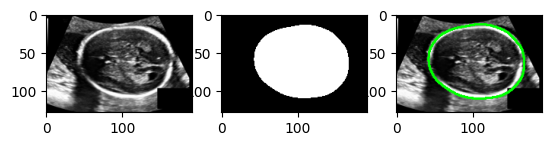

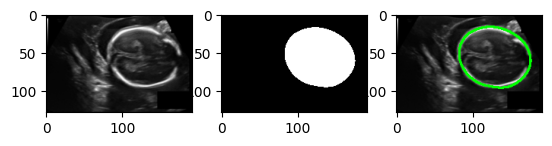

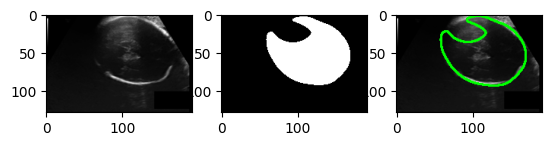

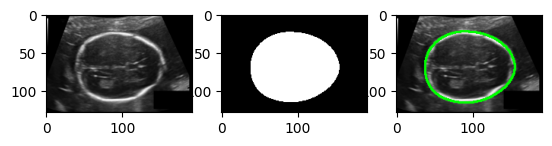

In [75]:
from torchvision.transforms.functional import to_tensor, to_pil_image

for fn in rndImgs:
    path2img = os.path.join(path2test, fn)
    img = Image.open(path2img)
    img=img.resize((w,h))
    img_t=to_tensor(img).unsqueeze(0).to(device)
    
    pred=model(img_t)
    pred=torch.sigmoid(pred)[0]
    mask_pred= (pred[0]>=0.5)
    mask_pred=mask_pred.to('cpu')

    plt.figure()
    plt.subplot(1, 3, 1) 
    plt.imshow(img, cmap="gray")

    plt.subplot(1, 3, 2) 
    plt.imshow(mask_pred, cmap="gray")
    
    plt.subplot(1, 3, 3) 
    show_img_mask(img, mask_pred)
